In [1]:
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import s3fs
s3 = s3fs.S3FileSystem()

df_jan = pq.ParquetDataset('s3://telenor-se-dataplatform-prod-sthlm-dswbexport/test/OUT/NYC/ds=2020-01', filesystem=s3).read_pandas().to_pandas()
df_feb = pq.ParquetDataset('s3://telenor-se-dataplatform-prod-sthlm-dswbexport/test/OUT/NYC/ds=2020-02', filesystem=s3).read_pandas().to_pandas()
df_mar = pq.ParquetDataset('s3://telenor-se-dataplatform-prod-sthlm-dswbexport/test/OUT/NYC/ds=2020-03', filesystem=s3).read_pandas().to_pandas()

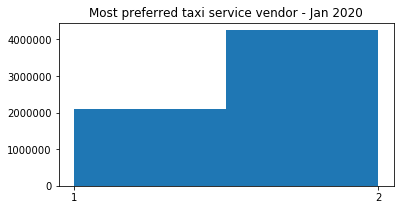

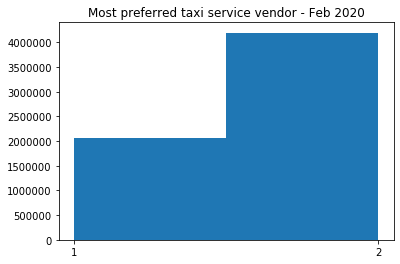

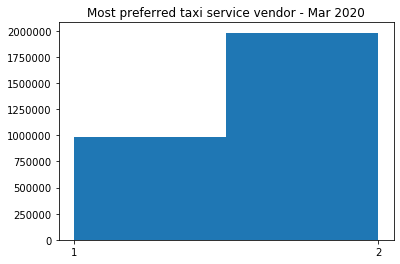

In [36]:
# Jan 2020 -Frequency distribution of service vendor
df_jan_ven = df_jan['VendorID']
df_jan_ven = df_jan_ven[df_jan_ven.notnull()].sort_values(ascending=True)
ax=plt.subplots(figsize=(6,3))

ax = plt.hist(df_jan_ven, bins=2)
title="Most preferred taxi service vendor - Jan 2020"
plt.title(title, fontsize=12)
plt.show()


# Feb 2020 - Frequency distribution of service vendor
df_feb_ven = df_feb['VendorID']
df_feb_ven = df_feb_ven[df_feb_ven.notnull()].sort_values(ascending=True)


ax = plt.hist(df_feb_ven, bins=2)
title="Most preferred taxi service vendor - Feb 2020"
plt.title(title, fontsize=12)
plt.show()


# March 2020 - Frequency distribution of service vendor
df_mar_ven = df_mar['VendorID']
df_mar_ven = df_mar_ven[df_mar_ven.notnull()].sort_values(ascending=True)


ax = plt.hist(df_mar_ven, bins=2)
title="Most preferred taxi service vendor - Mar 2020"
plt.title(title, fontsize=12)
plt.show()

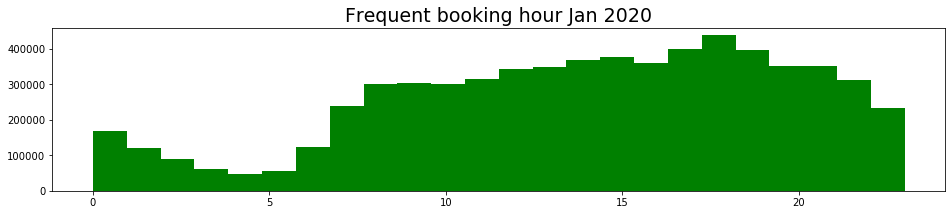

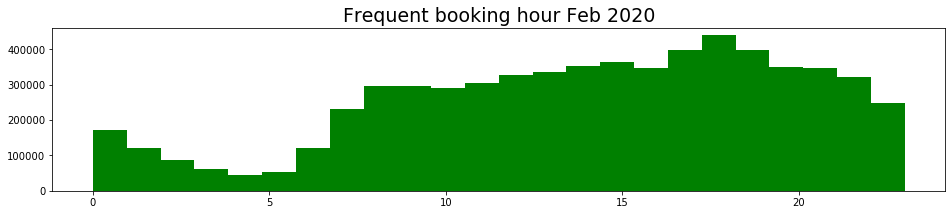

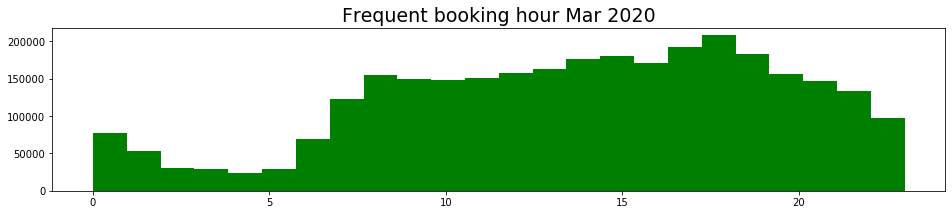

In [64]:
# Jan 2020 -Frequency distribution of booking hour
df_jan_hour = df_jan['tpep_pickup_datetime'].dt.hour
df_jan_hour = df_jan_hour.sort_values(ascending=True)
ax=plt.subplots(figsize=(16,3))

ax = plt.hist(df_jan_hour,color = "green", bins=24)
title="Frequent booking hour Jan 2020"
plt.title(title, fontsize=19)
plt.show()


# Feb 2020 -Frequency distribution of booking hour
df_feb_hour = df_feb['tpep_pickup_datetime'].dt.hour
df_feb_hour = df_feb_hour.sort_values(ascending=True)

ax=plt.subplots(figsize=(16,3))
ax = plt.hist(df_feb_hour,color = "green", bins=24)
title="Frequent booking hour Feb 2020"
plt.title(title, fontsize=19)
plt.show()


# Mar 2020 -Frequency distribution of booking hour
df_mar_hour = df_mar['tpep_pickup_datetime'].dt.hour
df_mar_hour = df_mar_hour.sort_values(ascending=True)

ax=plt.subplots(figsize=(16,3))
ax = plt.hist(df_mar_hour,color = "green", bins=24)
title="Frequent booking hour Mar 2020"
plt.title(title, fontsize=19)
plt.show()


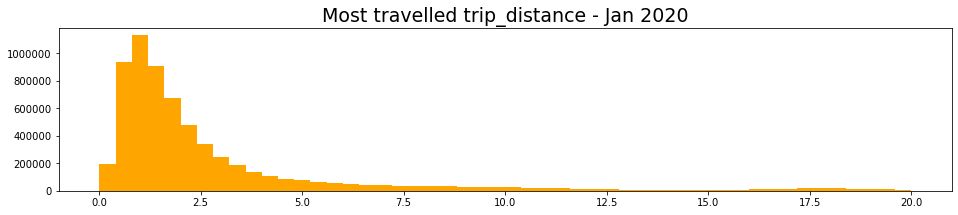

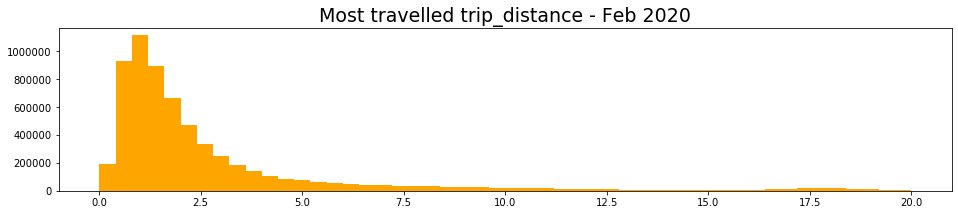

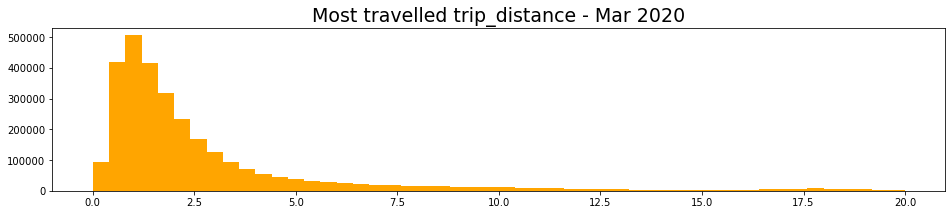

In [66]:
# Jan 2020 - Frequency distribution of trip_distance
df_jan_trip = df_jan['trip_distance']
df_jan_trip = df_jan_trip[(df_jan_trip > 0) & (df_jan_trip < 20) ].sort_values(ascending=True) # To set the right scale as # rides above 20 are very less. 


ax=plt.subplots(figsize=(16,3))
ax = plt.hist(df_jan_trip,color = "orange", bins=50)
title="Most travelled trip_distance - Jan 2020"
plt.title(title, fontsize=19)
plt.show()

# Feb 2020 - Frequency distribution of trip_distance
df_feb_trip = df_feb['trip_distance']
df_feb_trip = df_feb_trip[(df_feb_trip > 0) & (df_feb_trip < 20) ].sort_values(ascending=True) # To set the right scale as # rides above 20 are very less. 


ax=plt.subplots(figsize=(16,3))
ax = plt.hist(df_feb_trip,color = "orange", bins=50)
title="Most travelled trip_distance - Feb 2020"
plt.title(title, fontsize=19)
plt.show()


# Maar 2020 - Frequency distribution of trip_distance
df_mar_trip = df_mar['trip_distance']
df_mar_trip = df_mar_trip[(df_mar_trip > 0) & (df_mar_trip < 20) ].sort_values(ascending=True) # To set the right scale as # rides above 20 are very less. 


ax=plt.subplots(figsize=(16,3))
ax = plt.hist(df_mar_trip,color = "orange", bins=50)
title="Most travelled trip_distance - Mar 2020"
plt.title(title, fontsize=19)
plt.show()


# Insight: Most rides are short distance rides.

In [83]:
#df_feb.combine(df_feb) #2969412 6250550
df_combined = pd.concat([df_jan, df_feb, df_mar])

VendorID                 15559617
tpep_pickup_datetime     15711379
tpep_dropoff_datetime    15711379
passenger_count          15559617
trip_distance            15711379
RatecodeID               15559617
store_and_fwd_flag       15559617
PULocationID             15711379
DOLocationID             15711379
payment_type             15559617
fare_amount              15711379
extra                    15711379
mta_tax                  15711379
tip_amount               15711379
tolls_amount             15711379
improvement_surcharge    15711379
total_amount             15711379
congestion_surcharge     15711379
dtype: int64

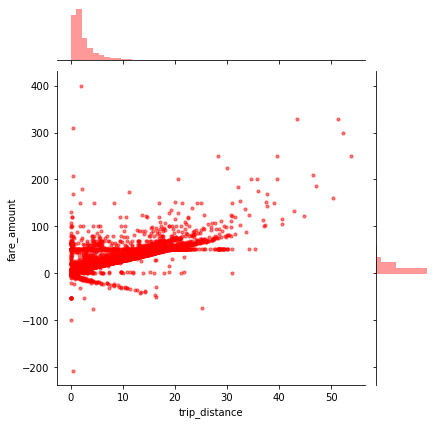

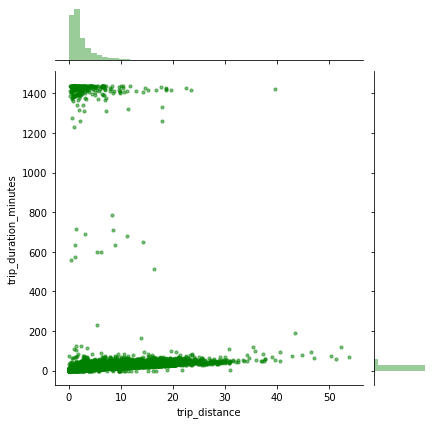

In [97]:
# Below plots can help identify the outliers in the data.

import seaborn as sns
import pandas as pd

df_combined = pd.concat([df_jan, df_feb, df_mar])
df_combined['pickup_datetime'] = pd.to_datetime(df_combined['tpep_pickup_datetime'])
df_combined['dropoff_datetime'] = pd.to_datetime(df_combined['tpep_dropoff_datetime'])
df_combined['trip_duration_minutes'] = (df_combined['tpep_dropoff_datetime'] - df_combined['tpep_pickup_datetime']).dt.total_seconds()/60

# plots
sns.jointplot('trip_distance','fare_amount',data=df_combined[:100000],s=10,alpha=0.5,color='red')
sns.jointplot('trip_distance','trip_duration_minutes',data=df_combined[:100000],s=10,alpha=0.5,color='green')



['VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'RatecodeID' 'store_and_fwd_flag'
 'PULocationID' 'DOLocationID' 'payment_type' 'fare_amount' 'extra'
 'mta_tax' 'tip_amount' 'tolls_amount' 'improvement_surcharge'
 'total_amount' 'congestion_surcharge' 'pickup_datetime'
 'dropoff_datetime' 'trip_duration_minutes' 'pickup_month' 'pickup_hour']


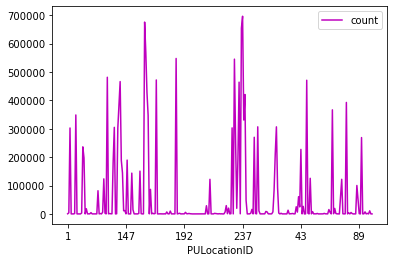

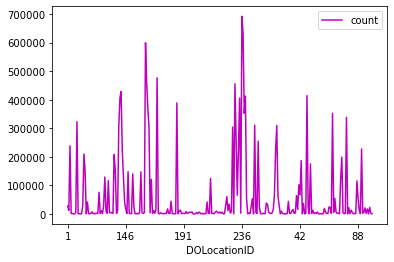

In [129]:
#Busiest pickup and drop off locations
#from the plot s we can chcek if a location has more pickup and less drop offs then it might be a public place like airport.
# if numbes same then it could be a residential place.

df_combined['pickup_month'] = df_combined['tpep_pickup_datetime'].dt.month
df_combined['pickup_hour'] = df_combined['tpep_pickup_datetime'].dt.hour
print(df_combined.columns.values)
#df_combined = df_combined[df_combined.]

# pickup location
df = df_combined.groupby(by=['PULocationID'], as_index = False).count()
df['count'] = df['VendorID']
df_pickup = df[['PULocationID','count']]
df_pickup.plot(x='PULocationID', y='count', style='m') #m

# drop off location
df_d = df_combined.groupby(by=['DOLocationID'], as_index = False).count()
df_d['count'] = df_d['VendorID']
df_dropoff = df_d[['DOLocationID','count']]
df_dropoff.plot(x='DOLocationID', y='count', style='m')
